## 1. ANOVA: Análisis de Varianza
(basado en apuntes de Dra. Yun Huang, versión 2018 curso INFO337)

- ¿Por qué ANOVA?
- Algunas distribuciones de interés: $\chi^2$, $F$, $t$ y Normal.
- ANOVA unidireccional (one-way):
    - Derivación y supuestos
    - Caso con distintos tamaños de muestra
    - Comparaciones múltiples
    - Robustez ANOVA
- Otro tópicos


### ¿Por qué ANOVA?
En los test de hipótesis estudiados en sesiones anteriores, consideramos el uso de la distribución $t$- student para analizar las medias muestrales.
En lo que sigue utilizaremos el Análisis de Varianza o  también llamado análisis de factores, para estudiar el efecto de uno o más factores (cada uno con dos o más niveles) sobre la media de una variable continua, que es el foco del 



### Test de igualdad de medias para dos poblaciones normales, considerando muestras independientes, con la misma varianza pero desconocida.

Sean $X_1,\cdots,X_n$ e $Y_1,\cdots,Y_m$ muestras independientes de poblaciones normales con medias desconocidas $\mu_x$ y $\mu_y$ y misma varianza desconocida $\sigma^2$.
Consideremos el test de hipótesis:

$$H_0: \mu_x = \mu_y$$
$$H_1: \mu_x \neq \mu_y$$

del Corolario del Teo de Fisher-Cochran se cumple:

$$ \frac{\bar{X} - \bar{Y} - (\mu_x - \mu_y)}{\sqrt{S_p^2(\frac{1}{n}+ \frac{1}{m})}} \sim t_{(n+m-2)}$$

donde $$S_p^2 = \frac{(n-1)S_X^2 + (m-1)S_Y^2}{n+m-2}$$

de manera que se rechaza $H_0$ si
$$\frac{\bar{X} - \bar{Y}}{\sqrt{S_p^2(\frac{1}{n}+ \frac{1}{m})}} >  t_{\frac{\alpha}{2},(n+m-2)}$$


En el caso en que se requiera comparar más de 2 grupos, o examinar el efecto de 1, 2 o mas factores, este procedimiento se vuelve ineficiente y es mas directo de abordar con el modelo del Análisis de la Varianza (ANOVA).
En efecto, si realizaramos el t-test con cada par de grupos, no tenemos una manera sencilla de calcular el error de tipo I de todos los grupos simultáneamente, el denominado Familywise error (error global), que para c tests se calcula como:

$$\bar{\alpha} = 1-(1-\alpha)^c$$
- con c=2 tests, el error de tipo I es 0.0975 (alrededor del 10%)
- con c=3 tests, el error de tipo I es 0.143 (alrededor del 14%)
- con c=10 tests, el error de tipo I es 0.40 (alrededor del 40%)

### Repaso: la distribución chi-cuadrado

Sean $Z_1,\cdots, Z_n\, v.a.i.i.d. \, \sim {\it N}(0,1)$ entonces 

$$ Y = Z_1^2+\cdots+Z_n^2 \sim \chi_{(n)}^2$$

donde $n$ son los grados de libertad de la distribución. 

Propiedades de la distribución $\chi^2$:

(i) Propiedad aditiva: si $X_1$ y $X_2$ son dos v.a. independientes distribuidas $\chi^2$ de $n_1$ y $n_2$ grados de libertad, entonces

$$X_1+X_2 \sim \chi_{(n_1+n_2)}^2$$
(ii) Esperanza y Varianza:
$$ E[X]= n,  \qquad Var[X]= 2n$$




### Repaso: la distribución F

Sean $X \sim \chi_n^2$ e $Y \sim \chi_m^2$  dos v.a. independientes $\chi^2$ de grados de libertad $n$ y $m$ respectivamente, entoncese se define:
$$F = \frac{\frac{X}{n}}{\frac{Y}{m}} \sim F_{n,m}$$

donde $F_{n,m}$ es la distribución $F$ de $n$ y $m$ grados de libertad.
También se nota $F(n,m)$.



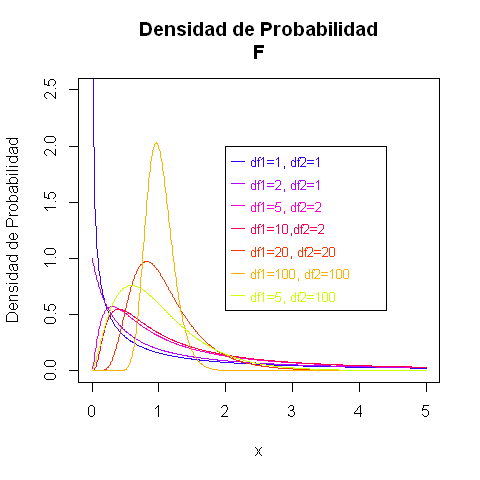

In [34]:
options(repr.plot.width=4, repr.plot.height=4)
vec <- seq(0,5,by=0.01)
par(cex=0.8)
plot(vec,df(vec,df1=1,df2=1,ncp=0),type="l", col="#3300FFFF",xlab="x",ylim=c(0,2.5), ylab= "Densidad de Probabilidad", main = "Densidad de Probabilidad
F")
lines(vec,df(vec,df1=2,df2=1,ncp=0),col="#B300FFFF")
lines(vec,df(vec,df1=5,df2=2, ncp=0),col="#FF00CCFF")
lines(vec,df(vec,df1=10,df2 = 2, ncp=0),col="#FF004DFF")
lines(vec,df(vec,df1=20,df2=20, ncp=0),col="#FF3300FF")
lines(vec,df(vec,df1=100,df2=100, ncp=0),col="#FFB300FF")
lines(vec,df(vec,df1=5,df2=100, ncp=0),col="#CCFF00FF")

legend(2, 2, legend=c("df1=1, df2=1", "df1=2, df2=1","df1=5, df2=2", "df1=10,df2=2",
                        "df1=20, df2=20", "df1=100, df2=100",  "df1=5, df2=100" ),
       col=rainbow(n=7,start=.7, end=.2),lty=rep(1,5),y.intersp=3,cex=0.8,text.width=2,text.col=rainbow(n=7,start=.7, end=.2))


Sea $F_{\alpha,n,m}$ tal que

$$P\{F > F_{\alpha,n,m} \} = \alpha$$

$F_{\alpha,n,m}$ es el percentil  $100(1-\alpha)$ de la distribución $F_{n,m}$.

#### Relación entre las distribuciones F y t
Si $X \sim t_{n}$ entonces $X^2 \sim F_{1,n}$

#### Demostración:

Por construcción, si $X \sim t_{n}$, entonces 
$$X = \frac{Z}{\sqrt{\frac{Y}{n}}}, \qquad con \, Z \sim {\cal N}(0,1) \,e \,Y \sim \chi_n^2$$

Entonces
$$X^2 = \frac{\frac{Z^2}{1}}{\frac{Y}{n}}, \qquad con \, Z^2 \sim \chi_1^2 \,e \,Y \sim \chi_n^2$$

### 1.1 ANOVA unidireccional

Suponga que tenemos $m$ tratamientos distintos, donde el resultado de aplicar el tratamiento $i$ a un individuo es una v.a. normal. Estamos interesados en probar la hipótesis de que todos los tratamientos tienen el mismo efecto. Para ello se aplica cada tratamiento a una muestra distinta de $n$ individuos y se analizan los resultados. 

Formalmente, sean $m$ muestras independientes de tamaño $n$: 

$$X_{i1},\cdots,X_{in} \sim i.i.d \,{\cal N}(\mu_i,\sigma^2), \qquad i=1,\cdots, m$$

Estamos interesados en probar:

$$H_0: \mu_1 = \mu_2 =\cdots =\mu_m\qquad$$
$$H_1: \exists i,j \in \{1,\cdots m \},\,  \mu_i \neq \mu_j$$

#### Supuestos ANOVA unidireccional:

- Observaciones independientes. Este supuesto no puede ser probado con ningún estadístico, es una consideración de diseño
- Normalidad: cada muestra debe provenir de una distribución normal. Utilizar por ejemplo, test de Shapiro-Wilk. Utilizar Q-Q plot para descartar la presencia de outliers.
- Varianza común (homogeneidad): misma varianza en los  grupos. Se puede probar con el test de Levene o con el test de Brown-Forsythe.

#### Idea general de la derivación ANOVA
Se trata de construir dos estimadores de la varianza común, el primer estimador no depende de si $H_0$ es cierto o no. En cambio, el segundo estimador asume que $H_0$ es cierto, en caso contrario este estimador sobreestima a $\sigma^2$.
El test compara ambos estimadores y rechaza $H_0$ cuando la tasa entre el segundo y primer estimador es suficientemente grande.

#### Derivando el primer estimador de $\sigma^2$
Consideremos la suma de la cuadrados de las versiones estandarizadas de las v.a. involucradas:

$$\sum_{i=1}^m \sum_{j=1}^n \frac{(X_{ij} - \mu_i)^2}{\sigma^2} \sim \chi^2_{nm}$$

Pero no conocemos $\mu_i$, entonces podemos utilizar sus estimadores de máxima verosimilitud:

$$X_{i.} = \frac{\sum_{j=1}^n X_{ij}}{n}$$

Recordemos que:
$$ \sum_{j=1}^n \frac{(X_{ij} - X_{i.})^2}{\sigma^2} \sim \chi^2_{n-1}$$


entonces por la propiedad de aditividad de la chi-cuadrado:

$$\sum_{i=1}^m \sum_{j=1}^n \frac{(X_{ij} -  X_{i.})^2}{\sigma^2} \sim \chi^2_{nm-m}$$


Denominaremos 

$$ SS_W = \sum_{i=1}^m \sum_{j=1}^n (X_{ij} -  X_{i.})^2$$

Entonces 
$$ \frac{E[SS_w]}{\sigma^2} = nm-m$$

y luego

$$ \frac{E[SS_w]}{nm-m} = \sigma^2$$


con lo cual tenemos nuestro primer estimador insesgado de $\sigma^2$:
$$MSE = \frac{SS_w}{nm-m}$$
que se conoce como "cuadrado de la media de los residuos" o "error cuadrático medio" o "varianza intragrupos". Notar que no considera ningun supuesto sobre $H_0$.




#### Derivando el segundo estimador de $\sigma^2$

En este caso suponemos que se cumple $H_0$, es decir

$$\mu = \mu_1 = \mu_2 = \cdots = \mu_m$$

De manera de que las medias muestrales cumplen:
$$X_{1.},X_{2.},\cdots,X_{m.} \sim i.i.d. \, {\cal N}\left(\mu, \frac{\sigma^2}{n} \right)$$

de donde se pueden derivar distribuciones normales estandarizadas 

$$Z_i = \frac{X_{i.}-\mu}{\sqrt{\frac{\sigma^2}{n}}} \sim {\cal N}(0,1) \qquad i=1,\cdots,m$$

de manera que:

$$\sum_{i=1}^m Z_i^2 = \sum_{i=1}^m \frac{(X_{i.}-\mu)^2}{\frac{\sigma^2}{n}} \sim \chi^2_{m}$$ 

Pero no conocemos $\mu$. Si lo reemplazamos por su estimador de máxima verosimilitud:

$$X_{..} = \frac{\sum_{i=1}^m X_{i.}}{m} = \frac{\sum_{i=1}^m \sum_{j=1}^n X_{ij}}{nm}$$

entonces
$$\sum_{i=1}^m Z_i^2 = \sum_{i=1}^m \frac{(X_{i.}-X_{..})^2}{\frac{\sigma^2}{n}} \sim \chi^2_{m-1}$$


Denominaremos 

$$ SS_b = n\sum_{i=1}^m  (X_{i.} -  X_{..})^2$$

Entonces, si $H_0$ es cierto, se cumple 
$$ \frac{E[SS_b]}{\sigma^2} = m-1$$

y luego

$$ \frac{E[SS_b]}{m-1} = \sigma^2$$


con lo cual tenemos nuestro segundo estimador insesgado de $\sigma^2$:
$$MSB = \frac{SS_b}{m-1}$$
que se conoce como "cuadrado de la media del modelo" o  "varianza entregrupos".


#### Test estadístico para ANOVA unidireccional

Se define como estadístico:
$$TS = \frac{MSB}{MSE} = \frac{varianza \, entregrupos}{varianza \, intragrupos}$$

Se rechazará la hipótesis nula cuando TS sea suficientemente grande.

#### ¿Cuál es la distribución de TS?

$$ TS \sim F_{m-1,nm-m}$$

#### Demostración

\begin{eqnarray}
TS & = & \frac{MSB}{MSE} = \frac{\frac{SS_b}{(m-1)}}{\frac{SS_W}{(nm-m)}}\\
&&\\
& = & \frac{\frac{n}{m-1}\sum_{i=1}^m  (X_{i.} -  X_{..})^2}{\frac{1}{nm-m}\sum_{i=1}^m \sum_{j=1}^n (X_{ij} -  X_{i.})^2} = 
\frac{\frac{1}{(m-1)}\sum_{i=1}^m  \frac{(X_{i.} -  X_{..})^2}{\sigma^2 /n}}{\frac{1}{(nm-m)}\sum_{i=1}^m \sum_{j=1}^n \frac{ (X_{ij} -  X_{i.})^2}{\sigma^2}}
\end{eqnarray}

Sea entonces $F\sim F_{m-1,nm-m}$ y $F_{m-1,nm-m,\alpha}$ tal que:

$$P\{F > F_{m-1,nm-m,\alpha}\} = \alpha$$

Se calcula entonces el valor de $TS$, si $TS > F_{m-1,nm-m,\alpha}$ se rechaza $H_0$

#### Identidad de suma de cuadrados

Notar que 
$$SS_{total} = SS_{intragrupos} + SS_{entregrupos}$$ 
$$SS_{T} = SS_{W} + SS_{b}$$ 
En efecto

$$\sum_{i=1}^m \sum_{j=1}^n  (X_{ij} -  X_{..})^2 = 
\sum_{i=1}^m \sum_{j=1}^n  (X_{ij} -  X_{i.})^2 +
\sum_{i=1}^m \sum_{j=1}^n  (X_{i.} -  X_{..})^2$$
y además

$$\sum_{i=1}^m \sum_{j=1}^n  X_{ij}^2 = nmX_{..}^2 + SS_b + SS_W $$


### Ejemplo
Una industria de automóviles desea probar la calidad de 3 tipos de combustibles. Para ello observa el rendimiento de los tres tipos de combustibles en 15 vehículos idénticos (5 con cada tipo de combustible). Los resultados (en millas por 10 galones de combustible) se describen a continuación:

gas1  gas2  gas3 
240.6 235.6 253.6

             Df Sum Sq Mean Sq F value Pr(>F)
combustibles  2  863.3   431.7   2.601  0.115
Residuals    12 1991.6   166.0               

[1] 3.885294


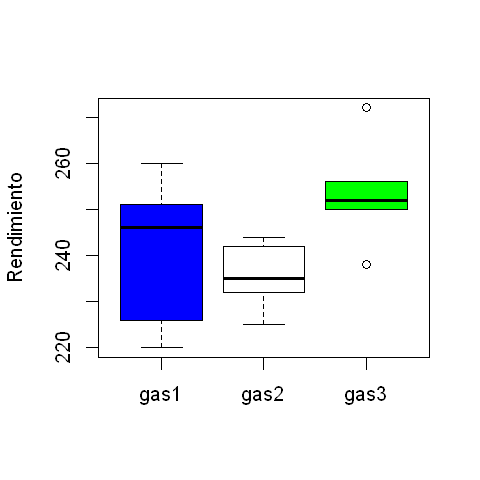

In [9]:
options(repr.plot.width=4, repr.plot.height=4)
gas1 <- c(220,251,226,246,260)
gas2 <- c(244,235,232,242,225)
gas3 <- c(252,272,250,238,256)
rendimiento <- c(gas1,gas2,gas3)
combustibles <- as.factor(c(rep(c("gas1", "gas2", "gas3"), each =5)))
boxplot(rendimiento ~ combustibles, col = c("blue", "white","green"), ylab = "Rendimiento")
tapply(rendimiento, combustibles, mean)
fm <- aov(lm(rendimiento ~ combustibles))
summary(fm)
print (qf(0.95,2,12))



#### Ejercicio 1
Desarrolle el ANOVA manualmente y compruebe los resultados entregados con R.


### ¿Qué ocurre si las muestras no son del mismo tamaño?

$$\sum_{i=1}^m \sum_{j=1}^{n_i} \frac{(X_{ij} -  X_{i.})^2}{\sigma^2} \sim \chi^2_{N}$$

donde $N = \sum_{i=1}^m n_i - m$. Y entonces,

$$ SS_W = \sum_{i=1}^m \sum_{j=1}^{n_i} (X_{ij} -  X_{i.})^2$$

por otra parte
$$\sum_{i=1}^m \frac{(X_{i.}-X_{..})^2}{\frac{\sigma^2}{n_i}} \sim \chi^2_{m-1}$$

y se definen

$$ SS_b = \sum_{i=1}^m n_i(X_{i.}-X_{..})^2$$

$$ TS = \frac{\frac{SS_b}{m-1}}{\frac{SS_W}{N}} \sim F_{m-1,N},\qquad N= \sum_{i=1}^m n_i - m$$


Finalmente, si $TS > F_{m-1,N,\alpha}$ se rechaza $H_0$.


#### Ejercicio 2
Desarrolle un ejemplo de ANOVA en R con muestras de tamaños distintos. Interprete sus resultados.

### Comparaciones múltiples
Si el test ANOVA es estadísticamente significativo, lo único que podemos concluir es que una o mas de las diferencias entre grupos es significativa, pero no sabemos que grupos son los que difirien. Para ello es necesario realizar "Comparaciones múltiples". Se trata de comparar cada grupo respecto de los otros grupos, o promedios de grupos. Se consideran dos posibilidades: 

- Comparaciones planeadas: existe interés por algunos grupos en particular
- Comparaciones Post hoc: no existen hipótesis específicas

#### Algunas preguntas
- Si el test ANOVA es estadísticamente significativo, implica que ¿existe al menos un grupo cuyo comportamiento difiere de los otros?

No necesariamente, podría ocurrir que sea la combinación de grupos que provoque las diferencias.
El test de Scheffe permite pesquisar las diferencias subyacentes.

- ¿Es posible encontrar diferencias siginificativas con las comparaciones múltiples, aunque ANOVA no haya sido significativo?

Si, es posible, debido a que los test de comparaciones múltiples están mas enfocados que ANOVA.

- ¿Es útil el resultado del test ANOVA?

Claro, cuando corresponde a la hipótesis en estudio!

## 1.2 Métodos de comparaciones múltiples

### Diferencias menos significativas (LSD)
Se define el siguiente estadístico cuya distribución es t-student, bajo 
$$H_0: \mu_1 = \mu_2 = \cdots = \mu_m$$
$$H_1: \exists i,j, \mu_i \neq \mu_j$$
Para cada par de grupos i,j se calcula 
$$t_N = \frac{X_{i.} - X_{j.}}{\sqrt{MSE \left(\frac{1}{n_i}+ \frac{1}{n_j}\right)}}, \qquad df =N = \sum_{i=1}^m n_i - m$$

Si $|t_N| > t_{N,\alpha/2}$ se rechaza $H_0$ en favor de $H_1: \mu_i \neq \mu_j$

Este enfoque presenta problemas con el error de tipo I, en función del número de comparaciones posibles.

### Tukey y Tukey-Kramer
#### Tukey, mismo tamaño muestral n
Se define el siguiente estadístico:
$$q_N =\frac{X_{i.} - X_{j.}}{\sqrt{MSE/n }}, \qquad df = N = nm-m$$


#### Tukey-Kramer, distintos tamaños muestrales
$$q_N = \frac{X_{i.} - X_{j.}}{\sqrt{\frac{1}{2} MSE \left(\frac{1}{n_i}+ \frac{1}{n_j}\right)}}, \qquad df =N = \sum_{i=1}^m n_i - m$$

En ambos casos $q_N$ sigue una distribución de rangos student

### Bonferroni
Utiliza el mismo estadístico que LSD, pero calcula la significancia $\alpha$ considerando que se realizan c comparaciones.

Dos posibilidades:

- Para un valor fijo de $\alpha$, se corrige el p-value multiplicando por el número de comparaciones:
$$p_{Bonferroni} = c* p_{LSD} = \frac{m(m-1)}{2} *p_{LSD}$$

- Se calcula un nuevo valor de $\alpha$ para mantener el error de tipo I global:
$$ \alpha_{nuevo} = \frac{\alpha}{c} = \frac{\alpha}{\frac{m(m-1)}{2}}$$
Por ejemplo, si $m=4, c=6$ y $\alpha=0.05$, entonces $\alpha_{nuevo} = 0.0083$






#### Ejercicio 3
Considere datos de cesantía del INE: https://www.ine.cl/estadisticas/sociales/mercado-laboral/ocupacion-y-desocupacion, escoja 3 o más regiones y realice un ANOVA para determinar si el porcentaje de cesantìa se comporta igual  o no (en términos de valores medios) en dichas regiones, en el curso de los últimos 12 meses (promedios trimestres móviles).
Si rechaza $H_0$ desarrolle comparaciones múltiples para determinar como difieren.

## 2. Análisis de asociación en v.a. discretas
En esta sección se presentan algunos tests que permiten analizar la asociación entre variables aleatorias discretas.

### 2.1 Tablas de contingencia
Consideremos que tenemos observaciones de dos variables discretas (o bien variables continuas agrupadas en clases). La tabla de contingencia contiene los efectivos correspondientes a cada pareja de valores (o clases) de ambas variables: 

$$\begin{array}{|c||c|c|c|c|c||c|}
\hline
\bf{X\mid Y}& \bf{d_1} &\cdots &\bf{d_k}& \cdots&\bf{d_s}& \text{total}\\
\hline\hline
\bf{c_1} & n_{11} & \cdots & n_{1k}& \cdots& n_{1s} &\bf { n_{1\bullet}}\\
\hline
\vdots & \vdots &&\vdots&&\vdots&\vdots\\
\hline
\bf{c_h} & n_{h1} & \cdots & n_{hk}& \cdots& n_{hs} & \bf{n_{h\bullet}}\\
\hline
\vdots & \vdots &&\vdots&&\vdots&\vdots\\
\hline
\bf{c_r} & n_{r1} & \cdots & n_{rk}& \cdots& n_{rs} & \bf{n_{r\bullet}}\\
\hline
\hline
\text{total} &\bf{n_{\bullet 1}}&\cdots& \bf{n_{\bullet k}}&\cdots&\bf{n_{\bullet s}}&\bf{n}\\ 
\hline \end{array}$$

Cada linea y cada columna corresponden  a una submuestra particular. La fila de índice $h$ es la distribución sobre  $ d_1,\ldots,d_s$ de los individuos para los cuales la variable $X$ toma el valor $c_h$. La columna de índice $k$ es la distribución sobre  $ c_1,\ldots,c_r$ de los  individuos para los cuales las variable $ Y$ toma el valor $ d_k$. Dividiendo las filas y columnas por sus sumas, se obtienen las distribuciones empíricas calculadas como las frecuencias condicionales. Para $ h=1,\ldots,r$ y  $ k=1,\ldots,s$, se notará :

$$ f_{k\mid h} = \frac{n_{hk}}{ n_{h\bullet}} \qquad \text{y} \qquad f_{h\mid k} = \frac{n_{hk}}{ n_{\bullet k}}$$

Estas distribuciones empíricas se denominan perfiles-fila y perfiles-columna respectivamente.

De acuerdo al  modelo probabilista generador de datos, la muestra: 
$ ((X_1,Y_1),\ldots,(X_n,Y_n))$ proviene de una distribución bidimensional. La hipótesis a probar es que las dos distribuciones marginales de dicha ley son independientes. Si este es el caso, los perfiles-fila serán todos muy similares a la distribución empírica de $Y$ asi como los perfiles-columna cercanos a la distribución de $X$: 

$$ f_{k\mid h} = \frac{n_{hk}}{n_{h\bullet}}\approx f_{\bullet k} = \frac{n_{\bullet k}}{ n}\qquad \text{y} \qquad f_{h\mid k} = \frac{n_{hk}}{n_{\bullet k}}\approx f_{h\bullet} = \frac{n_{h\bullet}}{n}$$

Lo que es lo mismo que decir que las frecuencias conjuntas deben ser cercanas al producto de las frecuencias marginales: 

$$f_{hk} = \frac{n_{hk}}{n} \approx f_{h\bullet}\, f_{\bullet k} =\frac{n_{h\bullet}}{n}\,\frac{n_{\bullet k}}{n}$$

Las frecuencias conjuntas (distribución observada) y los productos de frecuencas marginales (distribución teórica) representan dos distribuciones de probabilidad sobre el conjunto producto $ \{c_1,\ldots,c_r\}\times\{d_1,\ldots,d_s\}$. Y entonces podemos calcular la distancia de $\chi^2$ entre ellas. 


### 2.2 Test de Chi-cuadrado
Este test ha sido diseñado para comparar distribuciones de probabilidad discretas, peros se puede utilizar para datos continuos, si estos se agrupan en clases. Supongamos que tenemos una muestra aleatoria  $ (X_1,\ldots,X_n)$ de una ley desconocida. Las clases  $ c_1,\ldots,c_r$ son una partición del conjunto de valores posibles de la v.a. La hipótesis a probar se refiere a la distribución de estas clases. Sean $ P_0(c_1)\ldots,P_0(c_r)$ las probabilidades teóricas de cada clase, la hipótesis nula se escribe como:

$${\cal H}_0\;:\; \mathbb{P}[ X_i\in c_k] = P_0(c_k)\,,\;\forall k=1,\ldots,r$$

Bajo $ {\cal H}_0$, la distribución empírica de las clases de las muestra debe ser cercana a la teórica, siendo la distribución empírica simplemente la frecuencia de observaciones en cada clase  disponibles en la muestra:  

$$\widehat{P}(c_k) = \frac{1}{n}\sum_{i=1}^n {\mathbb 1} _{c_k}(X_i)$$

Una medida de la similitud entre la distribución empírica y la teórica será la "distancia" de $\chi^2$: 

#### Definición:
Se denomina distancia de $\chi^2$ entre dos distribuciones de probabilidad discretas $P_0$ y $\widehat{P}$ a la expresión siguiente: 

$$D_{\chi^2}(P_0,\widehat{P}) = \sum_{h=1}^r \frac{(P_0(c_h)-\widehat{P}(c_h))^2}{P_0(c_h)}$$

La "distancia" de $\chi^2$ es entonces la media ponderada de las diferencias al cuadrado entre los valores de 
$ P_0$ y $ \widehat{P}$. No es una distancia en el sentido usual del término, porque ni siquiera cumple con ser simétrica. Su distribución de probabilidad no tiene una expersión explícita en general, pero existe un resultado de comportamiento en el límite:
#### Teorema:
Bajo la hipótesis $ {\cal H}_0$, la ley de la variable aleatoria $T =  nD_{\chi^2}(P_0,\widehat{P})$ converge cuando $ n$ tiende al infinito hacia una ley  $\chi^2_{r-1}$.

Si la hipótesis nula es falsa, entonces $ T= nD_{\chi^2}(P_0,\widehat{P})$ tenderá hacia el infinito. Este es entonces un test unileateral a la derecha, por lo que para valores "grandes" de $T$ se rechazará $ {\cal H}_0$. 



### 2.3 Test Chi-cuadrado para tablas de contingencia

#### Proposición: 
La distancia de $\chi^2$ de contingencia entre la distribución empírica $ (f_{hk})$ y la distribución teórica $ (f_{h\bullet}f_{\bullet k})$ es igual a:

$$ D_{\chi^2} = \sum_{h=1}^r\sum_{k=1}^s \frac{(f_{hk} - f_{h \bullet} f_{\bullet k})^2}{f_{h \bullet} f_{\bullet k}} = -1 +  \sum_{h=1}^r\sum_{k=1}^s \frac{n_{hk}^2}{n_{h\bullet}\, n_{\bullet k}}$$


#### Demostración:
La primera expresión proviene directamente de la definición de la distancia  $\chi^2$. Luego se expande el cuadrado y se obtiene
$$D_{\chi^2} =  -1 +  \sum_{h=1}^r\sum_{k=1}^s \frac{n_{hk}^2}{n_{h\bullet}\, n_{\bullet k}}$$

De acuerdo a lo indicado en la sección anterior, es posible aproximar la ley de  $ nD_{\chi^2}$ por una $\chi^2$ cuyos grados de libertad es el número de clases menos 1 y disminuído por los parámetros estimados, que en este caso son las frecuencias de merginales $f_{h\bullet}$ y $f_{\bullet k}$. Es decir: 
$$rs-1-(r-1)-(s-1) = (r-1)(s-1)$$



#### Ejemplo:
Consideremos dos variables binarias referidas a una muestra de pacientes, una de las cuales ($X$) indica si la persona tiene tendencia suicida o no, y la otra clasifica sus enfermedades en "psicosis" o "neurosis" ($Y$). Se trata de analizar si existe una dependencia entre las tendencias suicidas y la clasificación de las enefermedades. Supongamos que la tabla de contingencia observada es la siguiente: 
$$\begin{array}{|c||c|c|c|}
\hline
\bf{X\mid Y}& \text{psicosis } & \text{neurosis} &\text{total}\\
\hline\hline
\text{con tendencia suicida} & 20 & 60 & 80\\
\hline
\text{sin tendencia suicida} & 180 & 140 &320\\
\hline
\text{total} &200&200&400\\ 
\hline \end{array}$$

La distancia de $\chi^2$ de contingencia queda:
$$D_{\chi^2} =  -1 +  \sum_{h=1}^r\sum_{k=1}^s \frac{n_{hk}^2}{n_{h\bullet}\, n_{\bullet k}} = -1 + \frac{200}{200*80} + \frac{3600}{200*80} + \frac{180*180}{200*320} + \frac{140*140}{200*320} = -1 + \frac{170}{160} = 0.0625$$
Asi: 

$nD_{\chi^2} = 400*0.0625= 25$ que debemos comparar con la ley $\chi^2_{1}$. De donde el p-value se calcula como

$$p= 1- F_{\chi^2_{1}}(25) =5.733031e-07$$


por lo que se rechaza la hipótesis de independencia y se concluye que existe dependencia entre ambas variables

In [25]:
p <- 1-pchisq(25,1)
print(p)

[1] 5.733031e-07


In [26]:
#usando el test predifinido en R
table <- rbind(c(20,60),c(180,140))
chisq.test(table,correct=FALSE)


	Pearson's Chi-squared test

data:  table
X-squared = 25, df = 1, p-value = 5.733e-07


### 2.4 Test de Bowker
Este test se utiliza para analizar la simetría en una tabla de contingencia construida a partir de dos muestras dependientes, típicamente pre y post un tratamiento.
El estadístico del test de Bowker se construye como:
$$ B= \sum_{j>i} \frac{(n_{ij} - n_{ji})^2}{n_{ij} + n_{ji}}$$

De manera que bajo la hipotesis nula de simetría en la tabla de contingencia, es decir que no hay efecto del tratamiento, se cumple asintóticamente que:
$$B \sim \chi^2_{\frac{n(n-1)}{2}}$$

Si se rechaza la hipótesis nula, y además se observan mas efectivos sobre la diagonal que bajo la diagonal se puede concluir que hay un efecto positivo del tratamiento en el criterio en análisis.

#### Ejemplo
Considere los datos de 54 estudiantes sometidos a una evaluación sobre sus habilidad de cohesión en la redacción de textos, antes y después de una intervención didáctica. La evaluación utiliza una escala de 4 niveles desde no logrado a totalmente logrado. 
Se pide evaluar si a intervención ha tenido efecto o no en la habilidad estudiada.



In [24]:
tabla <- rbind(c(0,2,3,2), c(2,2,3,7), c(3,4,6,19), c(0,0,1,2))
print(tabla)
B=0
efsd=efbd=0
for (i in 1:3){
    for (j in (i+1):4){
        B= B + (tabla[i,j]-tabla[j,i])^2/(tabla[i,j]+tabla[j,i])
        efsd =efsd + tabla[i,j]
        efbd = efbd + tabla[j,i]
    }
}
print(B)
print(c(efsd,efbd))
n = 4*3/2
q = qchisq(0.95,n)
print(q)
p <- 1-pchisq(B,n)
print(p)

     [,1] [,2] [,3] [,4]
[1,]    0    2    3    2
[2,]    2    2    3    7
[3,]    3    4    6   19
[4,]    0    0    1    2
[1] 25.34286
[1] 36 10
[1] 12.59159
[1] 0.000294974


Se rechaza la hipótesis nula de simetría en favor de un efecto positivo de la intervención didáctica.

In [28]:
##usando el test predefinido en R
mcnemar.test(tabla)


	McNemar's Chi-squared test

data:  tabla
McNemar's chi-squared = 25.343, df = 6, p-value = 0.000295
